In [1]:
import pandas as pd                 # Our pandas package
from pandas_datareader import data  # This is will give us access to FRED
import datetime as dt               # This will get us the datatime package
import matplotlib.pyplot as plt     # The new package we are learning about Matplotlib
                                    # pyplot is just one module of many in this library
    
%matplotlib inline 

### Step 1: Do you know how to read in data

Create a dataframe by downlaoding data from the following url

http://pages.stern.nyu.edu/~dbackus/Data/debt.csv

In [2]:
url = "http://pages.stern.nyu.edu/~dbackus/Data/debt.csv"

debt = pd.read_csv(url)

### Step 2: Do you know how to get information about the data set...

* What type of object is debt?
* What are its dimensions?
* What are its column labels? Row labels?
* What dtypes are the columns?

In [3]:
type(debt)

pandas.core.frame.DataFrame

In [8]:
debt.head() # This one is not on the list but gives us a quick peak at it

,ARG,DEU,GRC,Year
0,137.5,59.2,98.1,2002
1,106.0,64.6,94.9,2004
2,61.8,66.3,102.9,2006
3,47.0,64.9,108.8,2008
4,39.1,80.3,145.7,2010


In [4]:
debt.shape

(7, 4)

In [6]:
debt.columns

Index(['ARG', 'DEU', 'GRC', 'Year'], dtype='object')

In [7]:
debt.index

RangeIndex(start=0, stop=7, step=1)

In [9]:
debt.dtypes

ARG     float64
DEU     float64
GRC     float64
Year      int64
dtype: object

### Step 3: Do you know how to manipulate a DataFrame...

* Set Year as the index.
* Change the column labels from country codes to country names. Do this using both a dictionary and a list.
* Print the result to verify your changes.

In [10]:
debt.set_index("Year", inplace = True)

In [12]:
debt.head() # Here we see that the index is the year

,ARG,DEU,GRC
Year,,,
2002,137.5,59.2,98.1
2004,106.0,64.6,94.9
2006,61.8,66.3,102.9
2008,47.0,64.9,108.8
2010,39.1,80.3,145.7


In [25]:
# HEre is the way to do it via a dictionary

country_dict = {"ARG": "Argentina", "DEU": "Germany", "GRC": "Greece"}

debt.rename(columns = country_dict).head(10)

# Note that this is not set, so if we want to keep this change, we need to do
# inplace  = true

,Argentina,Greece,Germany
Year,,,
2002,137.5,59.2,98.1
2004,106.0,64.6,94.9
2006,61.8,66.3,102.9
2008,47.0,64.9,108.8
2010,39.1,80.3,145.7


In [26]:
# then this is the way to to it with a list, 
# here I'm converting the dictionary values to a list

debt.columns = list(country_dict.values())

debt.head()

,Argentina,Greece,Germany
Year,,,
2002,137.5,59.2,98.1
2004,106.0,64.6,94.9
2006,61.8,66.3,102.9
2008,47.0,64.9,108.8
2010,39.1,80.3,145.7


### Step 4: Do you know how to perform calculations on a DataFrame...

* Compute the mean (average) debt for each country.
* Compute the mean debt for each year.
* Compute the mean debt over both countries and years.

In [28]:
debt.mean()

Argentina     68.185714
Greece        69.628571
Germany      126.300000
dtype: float64
Year
2002    98.266667
2004    88.500000
2006    77.000000
2008    73.566667
2010    88.366667
2012    90.933333
2014    99.633333
dtype: float64


In [29]:
debt.mean(axis = 1)

Year
2002    98.266667
2004    88.500000
2006    77.000000
2008    73.566667
2010    88.366667
2012    90.933333
2014    99.633333
dtype: float64

In [30]:
debt.mean().mean()

# This is a way to comput the mean across all things...

88.03809523809524

### Step 5: Do you know how to make simple plots on the DataFrame

* Plot each country's debt against Year using a plot method.
* Change the linewidth to 2.

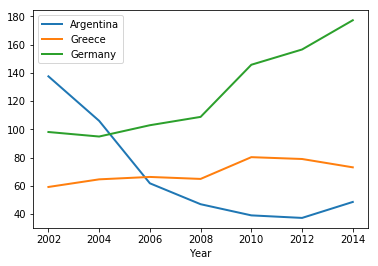

In [31]:
debt.plot(linewidth = 2)

### Step 6: Do you know basics about Matplotlib with the fig, ax approach

* Create figure and axis objects with plt.subplots().
* Graph public indebtedness over time using our debt data and the axis object we just created.
* Change the line width to 2.
* Change the colors to ['red', 'green', 'blue'].
* By calling a method on the axis object, change the lower limit on the y axis to zero.
* By calling a method on the axis object, add a title to the graph.
* By calling a method on the axis object, add a label to the y axis -- something like "Public Debt (% of GDP)".
* Make the line for Argentina thicker than the others. Hint: Do this by plotting a separate line applied to the same axis object.

Text(0,0.5,'Public Debt (% of GDP)')

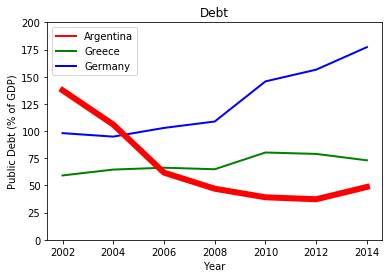

In [34]:
fig, ax = plt.subplots()

my_colors = ['red', 'green', 'blue']

debt.plot(ax = ax, linewidth = 2, color = my_colors)
debt["Argentina"].plot(ax = ax, linewidth = 6, color = "red")

ax.set_ylim(0,200)
ax.set_title("Debt")
ax.set_ylabel("Public Debt (% of GDP)")